<a href="https://colab.research.google.com/github/ainikaadutt/demo-repository/blob/main/uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("uber.csv")


In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
#check bias and variance
#if bias is high then underfit
#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
print(df.isnull().sum())


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


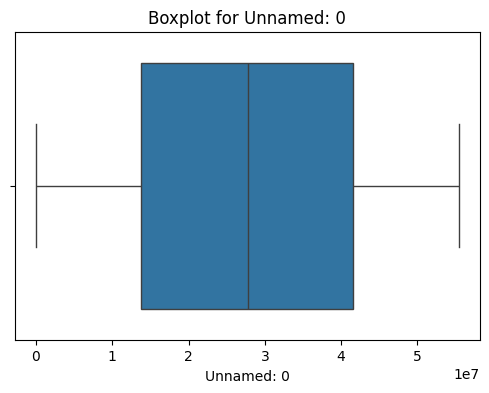

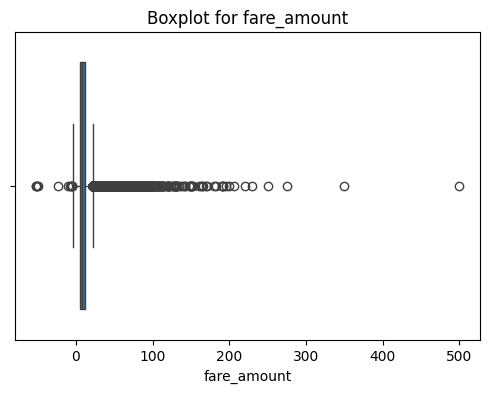

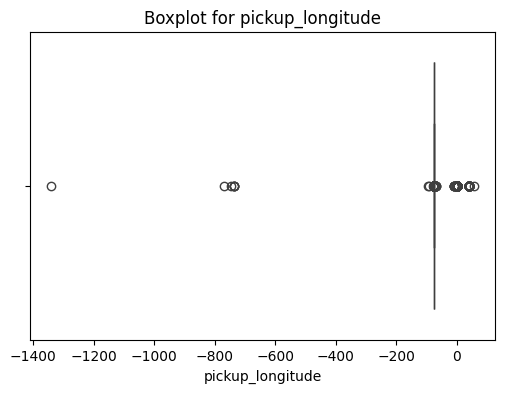

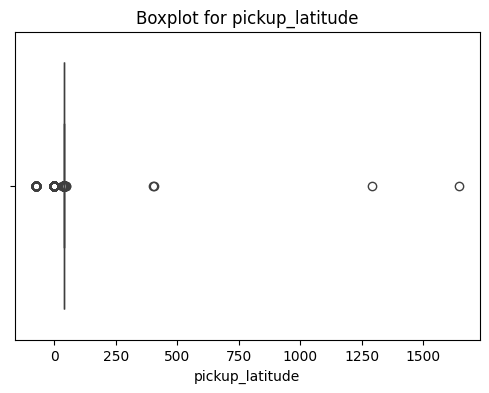

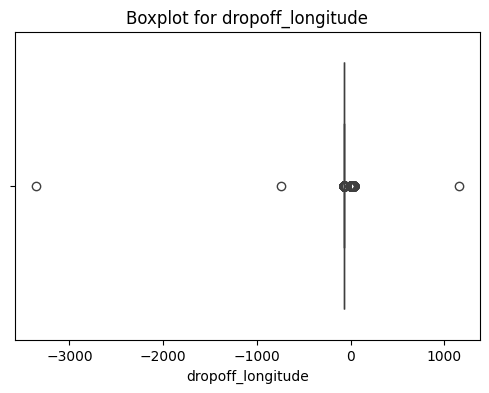

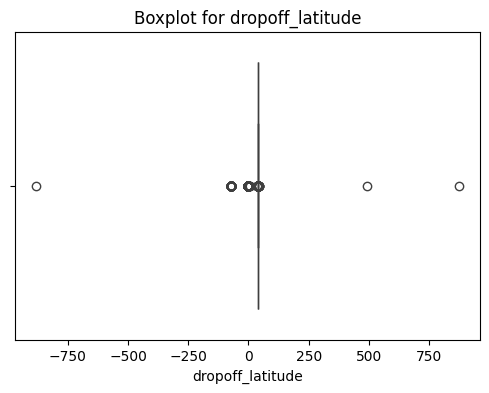

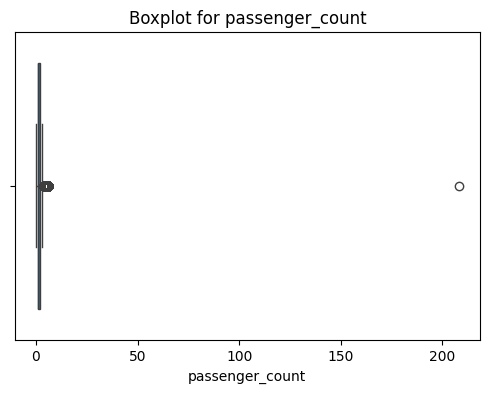

In [ ]:
#checking for outliers
for col in df.select_dtypes(include=['number']).columns:
    # Visual boxplot to check outliers
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [ ]:
#huge amount of outliers found
for col in df.select_dtypes(include='number').columns:
    # IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    has_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).any()

    # Replace outlier values with boundary values
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else
                                      lower_bound if x < lower_bound else x)
    print(f"Replaced outliers in '{col}' with boundary values.")


Replaced outliers in 'Unnamed: 0' with boundary values.
Replaced outliers in 'fare_amount' with boundary values.
Replaced outliers in 'pickup_longitude' with boundary values.
Replaced outliers in 'pickup_latitude' with boundary values.
Replaced outliers in 'dropoff_longitude' with boundary values.
Replaced outliers in 'dropoff_latitude' with boundary values.
Replaced outliers in 'passenger_count' with boundary values.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 3: Encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Step 4: Scale numeric features
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
#bias
#biased towards some particular value due to which wrong predictions are made.
#biasing is of three types
#1)prediction biasing
# if high biasing occur then it means  data is less (underfitting of model)
#to reduce biasing we add more data
#bias is reduced
#low bias might lead to overfitting only if variance is high

#best condition - low bias and low variance
#providing a lot of data of similar type

In [ ]:
y = df['passenger_count']

# Select all columns *except* 'Price' as features
feature_columns = df.columns[df.columns != 'passenger_count']
X = df[feature_columns]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [ ]:
y_pred = model.predict(X_test)


NameError: name 'model' is not defined

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#evaluating performance

NameError: name 'mean_squared_error' is not defined

In [ ]:
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" R² Score: {r2:.4f}")

NameError: name 'mse' is not defined

In [ ]:
#Plot Actual vs Predicted Price
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n Top Influencing Features on Price:")
print(coef_df.head(10))

NameError: name 'pd' is not defined